In [21]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# $\text{CO}_2$ Gas Data

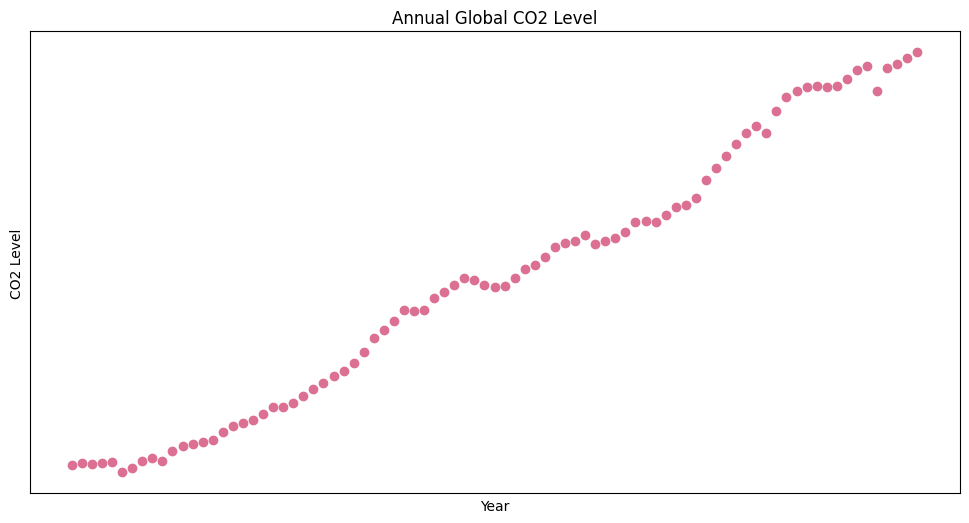

In [22]:
gas_data = pd.read_csv("annual_global_CO2_levels", delimiter='\t', header = 0) #read data file 
gas_data = gas_data.rename(columns={'Year    CO2 Level':'CO2 Level'}) # retitle column
# year is acting as the index

x_vals = gas_data.index #extranct x values
x_vals = (x_vals - x_vals.min()) / (x_vals.max() - x_vals.min()) #normalize values on a scale from 1 to 0
y_vals = gas_data['CO2 Level'] #extract y values
y_vals = (y_vals - y_vals.min()) / (y_vals.max() - y_vals.min()) #normalize values on a scale from 1 to 0

#graph data
plt.figure(figsize=(12,6))
plt.scatter(x_vals, y_vals, color='palevioletred') #color options come from StackOverFlow 
plt.xticks([]) # remove x ticks because scale was changes 
plt.yticks([]) # remove y ticks because scale was changes
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Annual Global CO2 Level")
plt.show()

The given data shows that the $\text{CO}_2$ level has increased over the years. 

In [23]:
#training the data - code from class (split the data into training and testing data)
x_train_val, x_test, y_train_val, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=13)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=13)

# Mean Absolute Error

$ E = \frac{1}{n}\sum_{i=1}^n{|(y_{i} - \hat{y_{i}})|} $

In [24]:
def error(y_pred: np.array, y:np.array) ->float: 
    return np.mean(np.abs(y_pred - y))

# Linear Fit

$y= Ax + B$

Justification: The data looks very linear. The year and the $\text{CO}_2$ level increase together at a relatively constant rate. 

Partial Derivatives: <br>
$E'_a(x) = \frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)x_i$ <br><br>
$E'_b(x) = \frac{1}{n}\sum_{i=1}^n{\text{sign}(y_i - \hat y_i)}$ 

In [25]:
def f_lin(a: float, b: float, x:np.array) -> np.array: 
    """return the y values of a linear function"""
    return a * x + b

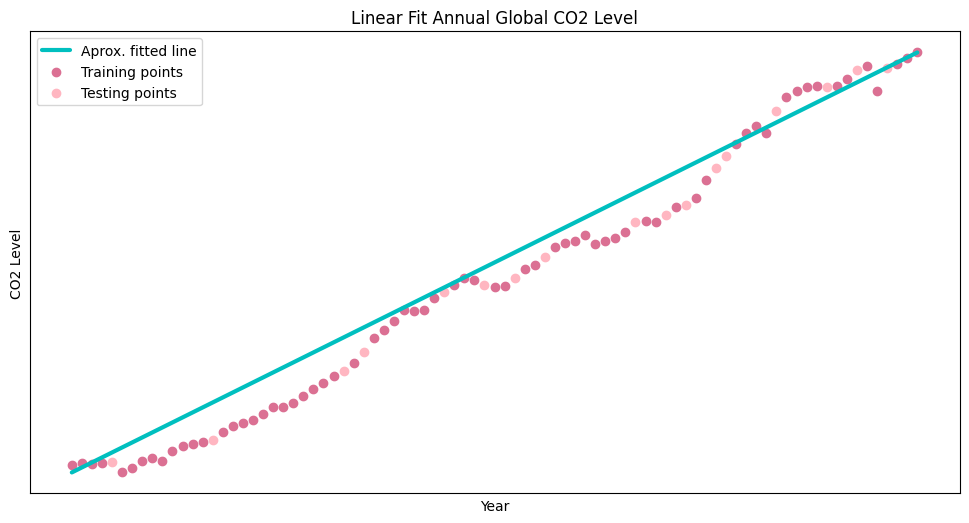

In [26]:
# inital parameters - estimated values
a = 1.0
b = 0.0

#inital fit 
x = np.linspace(0, 1, 200) #generate 200 x values between 0 and 1 to create line
y = f_lin(a, b, x) # linear fit with guessed values
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label = "Aprox. fitted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label = "Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changes 
plt.yticks([]) # remove y ticks because scale was changes
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Linear Fit Annual Global CO2 Level")
plt.legend()
plt.show()

The guessed inital coefficents for linear regression create a line that fits the overall trend of the $\text{CO}_2$ data. The line aligns to the first and last data points but visibly overestimates a lot of the data. 

In [27]:

#hyperparameters - manually narrowed using loss results
learning_rate = 1E-4
epochs = 500

training_loss = []
validation_loss = []

print(f'Initial Values: a: {a}, b: {b}')

#train the data 
for epoch in range(epochs): 
    y_model = f_lin(a, b, x_train) #make a prediction 
    
    #calculate the derivatives 
    da = np.mean(np.sign(y_model - y_train) * x_train) #the means acts as 1/n
    db = np.mean(np.sign(y_model - y_train))
    
    #adjust coeffienct values
    a = a - learning_rate * da 
    b = b - learning_rate * db
    
    #training loss 
    y_model = f_lin(a, b, x_train) #make a prediction using training values
    t_loss = error(y_model, y_train) #use y train
    training_loss.append(t_loss)
    
    #validation loss 
    y_v_model = f_lin(a, b, x_val) #make a preddiction using validation values
    v_loss = error(y_v_model, y_val) #use y val 
    validation_loss.append(v_loss)
    
    #show loss every 100 points
    if epoch % 100 == 0: 
        print(f'Epoch {epoch}: a: {a}, b: {b}, training loss: {t_loss}, validation loss: {v_loss}')
        
# show final values 
print(f'Final Values a: {a}, b: {b}') #final coefficents 
print(f'Final training loss: {t_loss}, Final validation loss {v_loss}') #final loss

Initial Values: a: 1.0, b: 0.0
Epoch 0: a: 0.9999762125220458, b: -6.481481481481482e-05, training loss: 0.05016884501362625, validation loss: 0.048967707648365964
Epoch 100: a: 0.9984862213403888, b: -0.005401851851851848, training loss: 0.047061548447396885, validation loss: 0.045504734275595475
Epoch 200: a: 0.9974875440917129, b: -0.009846296296296266, training loss: 0.04498650418071917, validation loss: 0.043500212090754976
Epoch 300: a: 0.9966989197530889, b: -0.013990740740740686, training loss: 0.04319634963058522, validation loss: 0.04193513793278493
Epoch 400: a: 0.996163205467379, b: -0.017694444444444367, training loss: 0.04179590853851079, validation loss: 0.04118727984401952
Final Values a: 0.9957358465608573, b: -0.021090740740740643
Final training loss: 0.04060946430975623, Final validation loss 0.04108027940673575


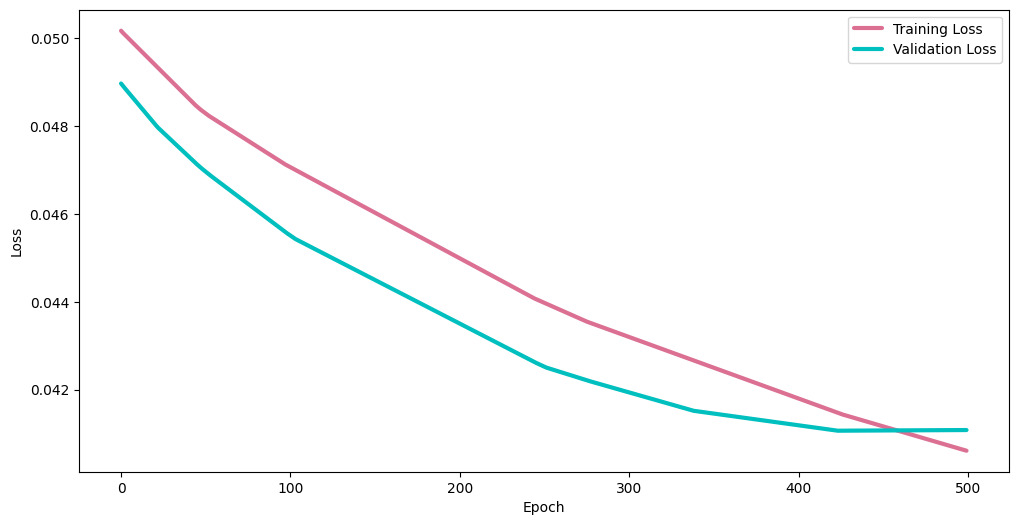

In [28]:
#graph loss functions - colors and other specifications from Stackoverflow
plt.figure(figsize=(12,6))
plt.plot(training_loss, label = 'Training Loss', color = 'palevioletred', linewidth = 3, solid_capstyle='round')
plt.plot(validation_loss, label = 'Validation Loss', color ='c',  linewidth = 3, solid_capstyle='round' )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

With a learning rate of $1 * 10^{-4}$, the training and validation loss of the linear coefficents converge after a little under $500$ epochs. The final loss is slightly more than 4% of the data. 

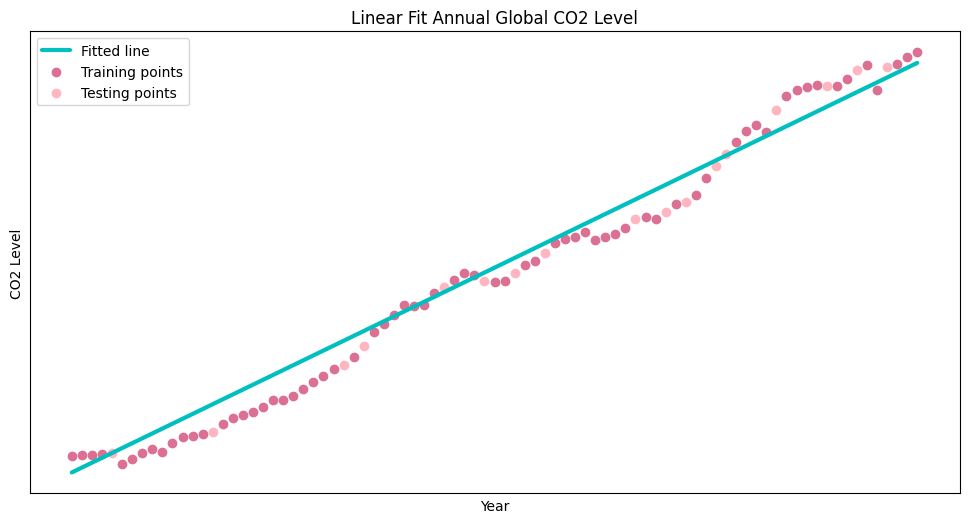

In [29]:
#graph final line fit
y = f_lin(a, b, x) #linear function with updated parameter 
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label = "Fitted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label = "Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changes 
plt.yticks([]) # remove y ticks because scale was changes
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Linear Fit Annual Global CO2 Level")
plt.legend()
plt.show()


The final linear regression model has a smaller slope and a lower y-intercept than the inital guess. The fitted line has shifted down and is no longer as close to the first or last given points of $\text{CO}_2$ data but there is significantly less overestimation. 

# Final Linear Function: <br>
# $y = 0.9957x - 0.01209$

# Square Root Function 

$y = A\sqrt{Bx + C} + D$

Justification: $\text{CO}_2$ levels are currectly rapidly increasing but at some point they will level off, similar to the shape of a square root function. It is also impossible for a square root function to return a negative y value, just as it is impossible to have a negative level of carbon dioxide.

Partial Derivatives <br>

$E'_a(x)=\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)\sqrt{Bx_i + C}$ <br>

$E'_b(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)\frac{Ax_i}{2\sqrt{Bx_i + C}}$ <br>

$E'_c(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)\frac{A}{2\sqrt{Bx_i + C}}$ <br>

$E'_d(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)$ 



In [30]:
def f_sqrt(a: float, b:float, c:float, d:float, x:np.array) -> np.array: 
    """return y values of a square root"""
    return a * np.sqrt(b * x + c) + d

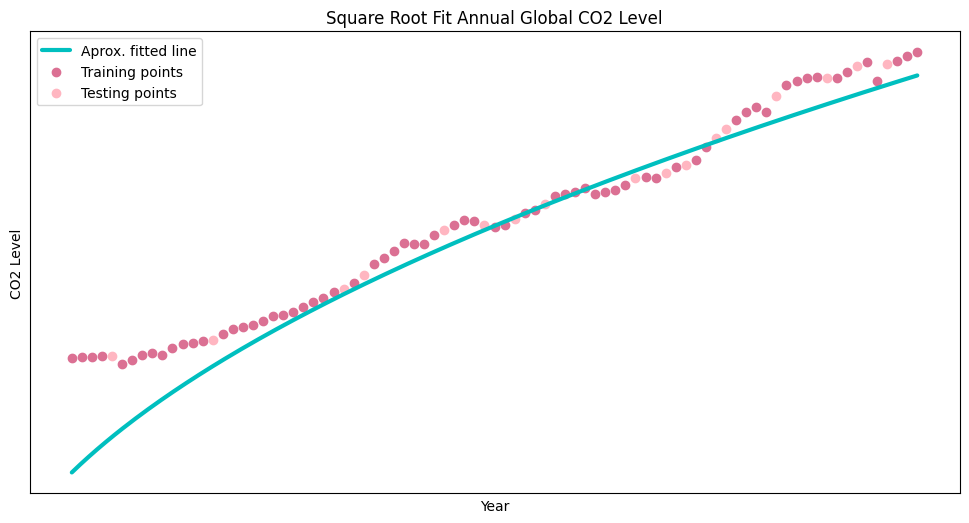

In [31]:
# inital parameters - estimated values - guess and check
a = 0.95
b = 3.5
c = 0.4
d = -0.95

#graph with initial values 
y = f_sqrt(a, b, c, d, x) #square root function with guessed values
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label = "Aprox. fitted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label = "Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changes 
plt.yticks([]) # remove y ticks because scale was changes
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Square Root Fit Annual Global CO2 Level")
plt.legend()
plt.show()


The inital guessed coefficents for the square root function create a line that greatly underestimate the first few of data points. As the year increases the function does better at fitting the data but continues to, on average, underestimate the $\text{CO}_2$ level. 

In [32]:
#hyperparameters - manually narrowed using loss results
learning_rate = 1E-4
epochs = 400

training_loss.clear()
validation_loss.clear()

print(f'Initial Values: a: {a}, b: {b}, c: {c} d: {d}')

#train the data 
for epoch in range(epochs): 
    y_model = f_sqrt(a, b, c, d, x_train) #make a prediction 
    
    #calculate the derivatives 
    da = np.mean(np.sign((y_model - y_train ) * np.sqrt(b * x_train + c))) 
    db = np.mean(np.sign((y_model - y_train) * ((a * x_train)/(2 * np.sqrt(b * x_train + c)))))
    dc = np.mean(np.sign((y_model - y_train) * (a /(2 * np.sqrt(b * x_train + c)))))
    dd = np.mean(np.sign(y_model - y_train))
    
    #adjust coeffienct values
    a = a - learning_rate * da 
    b = b - learning_rate * db
    c = c - learning_rate * dc
    d = d - learning_rate * dd
    
    #training loss 
    y_model = f_sqrt(a, b, c, d, x_train) #make a prediction using training values
    t_loss = error(y_model, y_train) #use y train
    training_loss.append(t_loss)
    
    #validation loss 
    y_v_model = f_sqrt(a, b, c, d, x_val) #make a preddiction using validation values
    v_loss = error(y_v_model, y_val) #use y val 
    validation_loss.append(v_loss)
    
     #show loss every 100 points
    if epoch % 100 == 0: 
        print(f'Epoch {epoch}: a: {a}, b: {b}, c: {c}, d: {d} training loss: {t_loss}, validation loss: {v_loss}')
        
# show final values 
print(f'Final Values a: {a}, b: {b}, c:{c}, d: {d}') #final coefficents 
print(f'Final training loss: {t_loss}, Final validation loss {v_loss}') #final loss

Initial Values: a: 0.95, b: 3.5, c: 0.4 d: -0.95
Epoch 0: a: 0.9500629629629629, b: 3.500061111111111, c: 0.400062962962963, d: -0.949937037037037 training loss: 0.07635032652950019, validation loss: 0.08123173156528549
Epoch 100: a: 0.955425925925927, b: 3.5052388888888784, c: 0.40542592592592636, d: -0.9445740740740729 training loss: 0.06835385427978012, validation loss: 0.07127417735999844
Epoch 200: a: 0.9594185185185178, b: 3.509046296296284, c: 0.40941851851851924, d: -0.9405814814814821 training loss: 0.06391127382671813, validation loss: 0.06529648228642133
Epoch 300: a: 0.9619666666666623, b: 3.5114092592592625, c: 0.4119666666666674, d: -0.9380333333333376 training loss: 0.06218196901239616, validation loss: 0.06235097680058301
Final Values a: 0.9641592592592583, b: 3.513418518518535, c:0.414159259259258, d: -0.9358407407407416
Final training loss: 0.06093812148465704, Final validation loss 0.06052224237919624


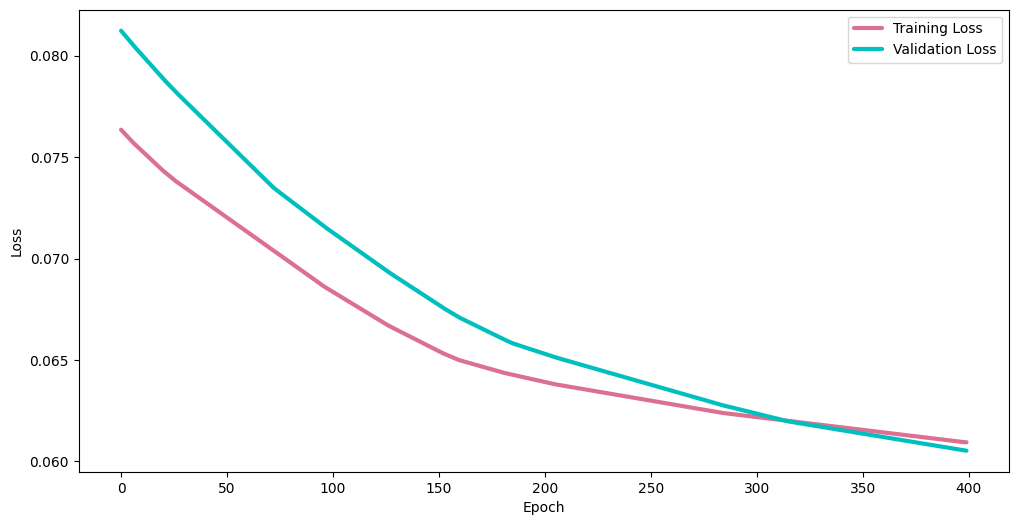

In [33]:
# graph training and validation error - look for convergence
plt.figure(figsize=(12,6))
plt.plot(training_loss, label = 'Training Loss', color = 'palevioletred', linewidth = 3, solid_capstyle='round')
plt.plot(validation_loss, label = 'Validation Loss', color ='c',  linewidth = 3, solid_capstyle='round' )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

With a learning rate of $1 * 10^{-4}$, the training and validation loss of the square root function coefficents converge after a little under $400$ epochs. The final loss is around 6% of the data

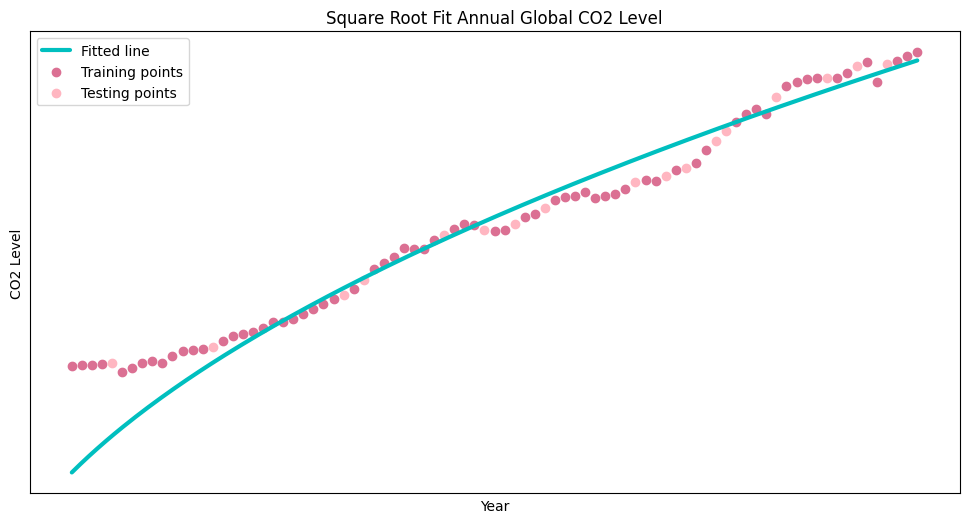

In [34]:
#graph final line fit
y = f_sqrt(a, b, c, d, x) #using square root function with updated coefficents
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label="Fitted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label = "Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changed
plt.yticks([]) # remove y ticks because scale was changed
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Square Root Fit Annual Global CO2 Level")
plt.legend()
plt.show()

The final fitted square root function starts at a similar point to the original function so it still underestimates the first few data points. The fitted line has a sharper inital slope and overestimates more points but has an overall better fit.

# Final Square Root Function: <br>
# $y=0.9641\sqrt{3.513x+0.4142}-0.9358$

# Sin Function

$y = A\text{sin}(Bx + C) + D$

Justification: At some point in the future the $\text{CO}_2$ levels will reach a maximum 

Partial Derivaties: <br>

$E'_a(x)=\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)sin(Bx_i + C)$ <br>

$E'_b(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)x_icos(Bx_i + C)$ <br>

$E'_c(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)cos(Bx_i + C)$ <br>

$E'_d(x) =\frac{1}{n}\sum_{i=1}^n \text{sign}(y_i - \hat y_i)$ 


In [35]:
def f_sin(a: float, b:float, c:float, d:float, x:np.array) -> np.array:
    """return the y values of a sine function"""
    return a * np.sin(b * x + c)+ d

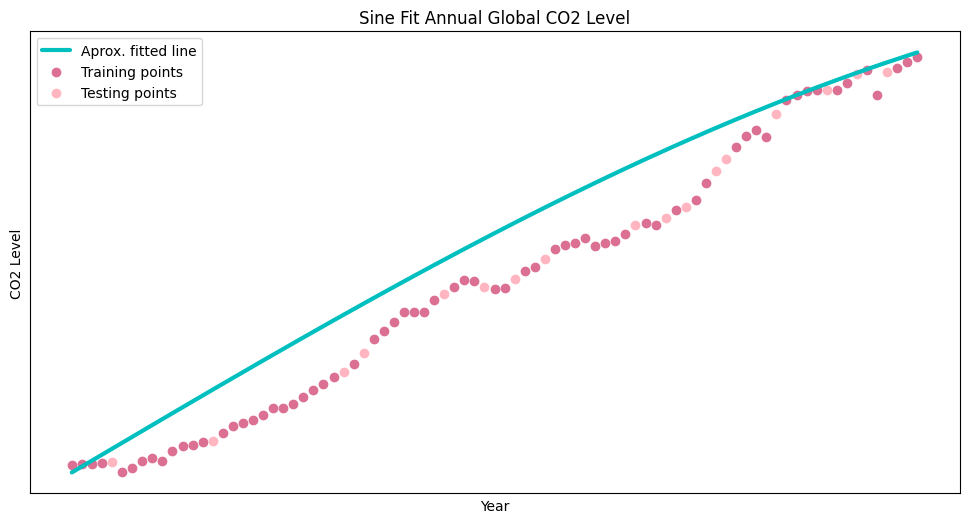

In [36]:
# inital parameters - estimated values - guess and check
a = 1.2
b = 1.0
c = 0.0
d = 0.0

#graph with initial values 
y = f_sin(a, b, c, d, x) #sin function with guessed values
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label = "Aprox. fitted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label = "Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changes 
plt.yticks([]) # remove y ticks because scale was changes
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Sine Fit Annual Global CO2 Level")
plt.legend()
plt.show()

The inital guessed coefficents for the sine function creates a line that captures the overall trend of the data but overestimates most of the data points. Similar to the inital linear function, the initial sine function aligns to the first and last $\text{CO}_2$ data points, but misses a lot inbetween. 

In [37]:
#hyperparameters - manually narrowed using loss results
learning_rate = 1E-4
epochs = 800

training_loss.clear()
validation_loss.clear()

print(f'Initial Values: a: {a}, b: {b}, c: {c} d: {d}')

#train the data 
for epoch in range(epochs): 
    y_model = f_sin(a, b, c, d, x_train) #make a prediction 
    
    #calculate the derivatives 
    da = np.mean(np.sign((y_model - y_train ) * np.sin(b * x_train + c)))
    db = np.mean(np.sign((y_model - y_train) * x_train * np.cos(b * x_train + c)))
    dc = np.mean(np.sign((y_model - y_train) * np.cos(b * x_train + c)))
    dd = np.mean(np.sign(y_model - y_train))
    
    #adjust coeffienct values
    a = a - learning_rate * da 
    b = b - learning_rate * db
    c = c - learning_rate * dc
    d = d - learning_rate * dd
    
    #training loss 
    y_model = f_sin(a, b, c, d, x_train) #make a prediction using training values
    t_loss = error(y_model, y_train) #use y train
    training_loss.append(t_loss)
    
    #validation loss 
    y_v_model = f_sin(a, b, c, d, x_val) #make a preddiction using validation values
    v_loss = error(y_v_model, y_val) #use y val 
    validation_loss.append(v_loss)
    
     #show loss every 100 points
    if epoch % 100 == 0: 
        print(f'Epoch {epoch}: a: {a}, b: {b}, c: {c}, d: {d} training loss: {t_loss}, validation loss: {v_loss}')
        
# show final values 
print(f'Final Values a: {a}, b: {b}, c:{c}, d: {d}') #final coefficents 
print(f'Final training loss: {t_loss}, Final validation loss {v_loss}') #final loss

Initial Values: a: 1.2, b: 1.0, c: 0.0 d: 0.0
Epoch 0: a: 1.1999092592592593, b: 0.9999092592592592, c: -8.888888888888889e-05, d: -8.888888888888889e-05 training loss: 0.09171282976794767, validation loss: 0.08993337447128072
Epoch 100: a: 1.1921537037037053, b: 0.9923388888888881, c: -0.007474074074074057, d: -0.007474074074074057 training loss: 0.07549292085713336, validation loss: 0.07451018732818959
Epoch 200: a: 1.1857537037037078, b: 0.9862240740740776, c: -0.01340370370370365, d: -0.01340370370370365 training loss: 0.06530666472027345, validation loss: 0.0642939362615041
Epoch 300: a: 1.1796907407407495, b: 0.9807166666666678, c: -0.01872592592592584, d: -0.01872592592592584 training loss: 0.05720083252901444, validation loss: 0.05539773906224008
Epoch 400: a: 1.1743685185185275, b: 0.9759537037037069, c: -0.02330370370370359, d: -0.02330370370370359 training loss: 0.05132942070164259, validation loss: 0.04775122306551786
Epoch 500: a: 1.1693425925926035, b: 0.9718537037037086,

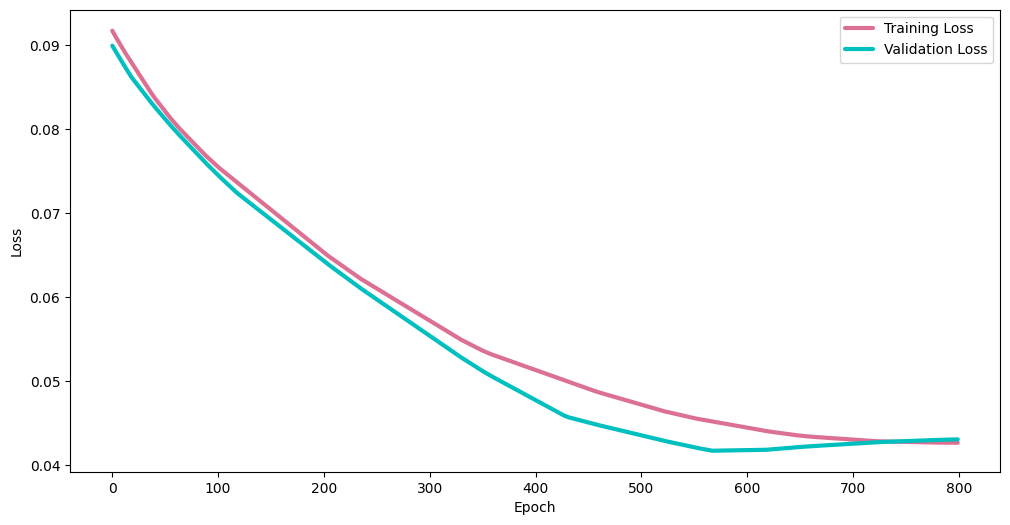

In [38]:
# graph training and validation error - look for convergence
plt.figure(figsize=(12,6))
plt.plot(training_loss, label = 'Training Loss', color = 'palevioletred', linewidth = 3, solid_capstyle='round')
plt.plot(validation_loss, label = 'Validation Loss', color ='c',  linewidth = 3, solid_capstyle='round' )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

With a learning rate of $1 * 10^{-4}$, the training and validation loss of the sine function coefficents converge after around $750$ epochs. The final loss is slightly more than 4% of the data. 

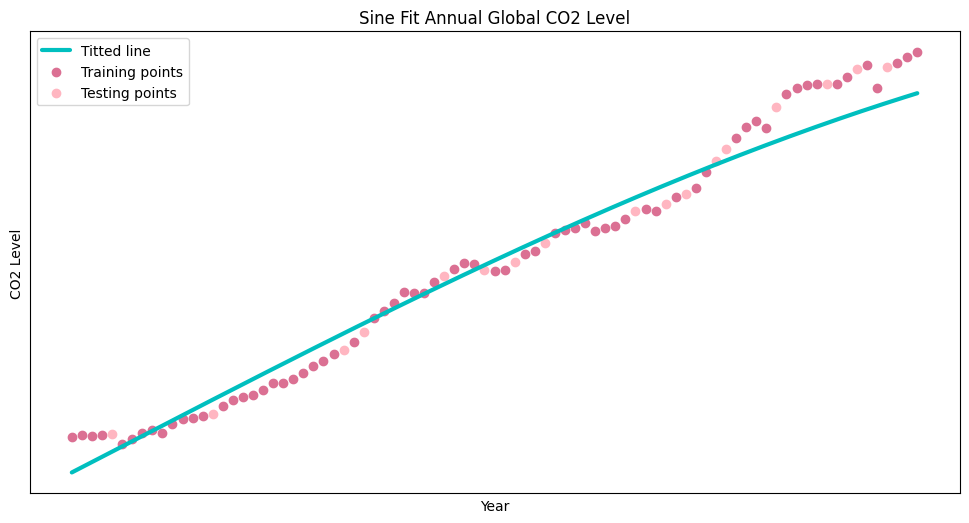

In [39]:
#graph final line fit
y = f_sin(a, b, c, d, x) #using sine function with updated coefficents
plt.figure(figsize=(12,6))
plt.plot(x, y, 'c', linewidth = 3, solid_capstyle='round', label = "Titted line")
plt.scatter(x_train_val, y_train_val, color='palevioletred', label="Training points")
plt.scatter(x_test, y_test, color="lightpink", label = "Testing points")
plt.xticks([]) # remove x ticks because scale was changed
plt.yticks([]) # remove y ticks because scale was changed
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("Sine Fit Annual Global CO2 Level")
plt.legend()
plt.show()

The final sine function is shifted down and has a sharper curve than the origional sine function. It also  underestimates most of the later data points but fits better to a majority of the data.

# Final Sin Function

# $y = 1.159\text{sin}(0.9646x - 0.03393) - 0.03393$

# Write- Up

Three different function were fitted the the $\text{CO}_2$ data. A linear function, $y = 0.9957x - 0.01209$ , a square root function, $y=0.9641\sqrt{3.513x+0.4142}-0.9358$, and a sine function, $y = 1.159\text{sin}(0.9646x - 0.03393) - 0.03393$. For all function the learning rate was $1*10^{-4}$.<br> 

The square root function had the lowest number of epchos, at 400 epochs, and the sine function had the largest number, at 800 epochs. The linear function took 500 epochs for the losses to converge.The convergence between the training loss and the validation loss represents a balance where the line is not overfitted or underfitted to the data.

The linear function ended with the best fit as it had the lowest training and validation loss of 4.1% for both.  The square root function had the worst fit, with 6.1% and 6% losses. The sine function had a training loss and validation loss of 4.2% and 4.3% respectivly.

The derivative with respect to each coefficent helped determine how to adjust each coefficent. I used ChatGPT to double check my partial derivatives. When the training loss and validation loss did not converge, I adjust the inital guess of the coefficents based on the trajectory of values.

I also attemted a third degree power function, a second degree power function, and an exponential function. The training and validation loss of the third degree power function did not converge, even with a large step size and a high number of epochs. The second degree power function and exponential function looked very similar. Both had high losses and I had trouble figuring out how to justify them so I ultimatly decided not to include them.